## Riemannian Gradient Functions for Sphere

In [82]:
function RGD(x0,Ret,RGrad,tol=1e-7,Nmax=10000,t=0.05)
    xk = x0
    x = zeros(length(x0),Nmax+1)
    x[:,1] = xk
    for k in 2:Nmax+1
        sk = -t*RGrad(xk)
        xk1 = Ret(sk,xk)
        x[:,k] = xk1
        err = norm(xk1-xk,2)/norm(xk,2)
        if err <= tol
            return x[:,1:k]
        end
        xk = xk1
    end
    return x
end
function SphereRGrad(x,Gradf)
    n = length(x)
    return (I-x*x')*Gradf(x)
end
function SphereRet(v,x)
    return (x+v)./norm(x+v)
end

SphereRet (generic function with 1 method)

## Setup Objective Function, Euclidean Gradient, and x0

In [16]:
using Random, LinearAlgebra
A = rand(10,10)
A = 1/2*(A+A')
f(x) = 1/2*x'*A*x
df(x) = A*x
x0 = rand(10,1);

## Riemannian Gradient Descent

In [83]:
RGrad(x) = SphereRGrad(x,df)
xRGD = RGD(x0,SphereRet,RGrad);

In [74]:
fRGD = zeros(size(xRGD,2),1)
reltol = zeros(size(xRGD,2)-1,1)
for k in 1:length(fRGD)
    fRGD[k] = f(xRGD[:,k])
end
for k in 1:length(reltol)
    reltol[k] = norm(xRGD[:,k+1]-xRGD[:,k])/norm(xRGD[:,k])
end

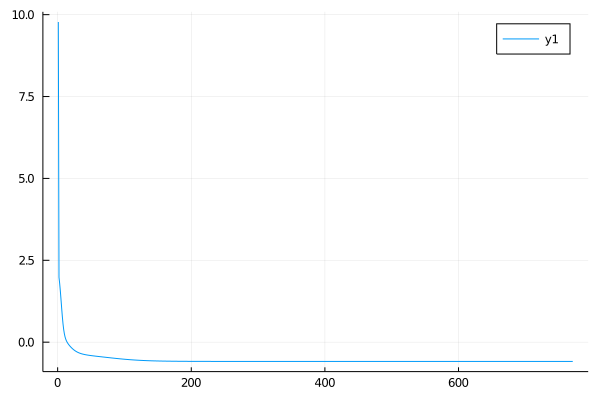

In [75]:
using Plots
plot(fRGD)

Can see this is a descent algorithm because $f(x_{k+1}) \leq f(x_k)$.

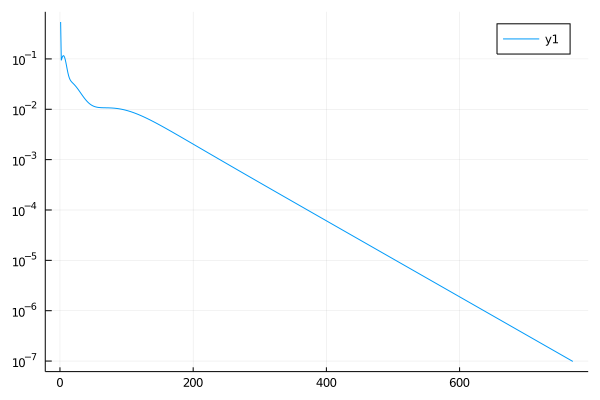

In [76]:
plot(reltol,yaxis=:log)

Relative error used for stopping condition in RGD.

In [78]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -1.1760030895549531
 -0.8314720262858029
 -0.6412954445981247
 -0.2552774415712795
  0.11610515756254358
  0.3006493033163431
  0.34477035661893907
  0.7489009358574061
  0.9304791298117578
  4.9443372720771634
vectors:
10×10 Array{Float64,2}:
  0.121341  -0.201823    -0.508349   …  -0.360963    0.160179  -0.27904
  0.332982  -0.720345     0.126939       0.242336    0.035341  -0.312554
  0.470521   0.299673     0.300141      -0.142355   -0.278884  -0.355984
 -0.316899   0.187956     0.245539      -0.574454    0.216207  -0.307615
  0.176516   0.444041     0.0375346      0.47145     0.52432   -0.352672
 -0.421072  -0.00730871   0.284273   …   0.349019   -0.406206  -0.345495
  0.018096  -0.0579604    0.0701988     -0.240156   -0.408765  -0.290537
 -0.189525   0.210398    -0.671109       0.221862   -0.350549  -0.233894
  0.171574   0.0152474   -0.186742      -0.0838968   0.107976  -0.373724
 -0.5

In [80]:
f(xRGD[:,end])*2

-1.176003089544113

In [81]:
xRGD[:,end]

10-element Array{Float64,1}:
  0.12134027227669135
  0.3329783133512068
  0.4705222896995754
 -0.31689841216775755
  0.17651812637822886
 -0.42107225619299943
  0.01809562642801361
 -0.18952358241268266
  0.17157358673885642
 -0.5276755848953869

We can see that the optimal solution found is indeed the eigenvector corresponding to the most negative eigenvalue of $A$.